# Исследовательский анализ данных

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
* `balcony` — число балконов  
* `ceiling_height` — высота потолков (м)  
* `cityCenters_nearest` — расстояние до центра города (м)  
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
* `first_day_exposition` — дата публикации  
* `floor — этаж`  
* `floors_total` — всего этажей в доме  
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

### Обзор данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


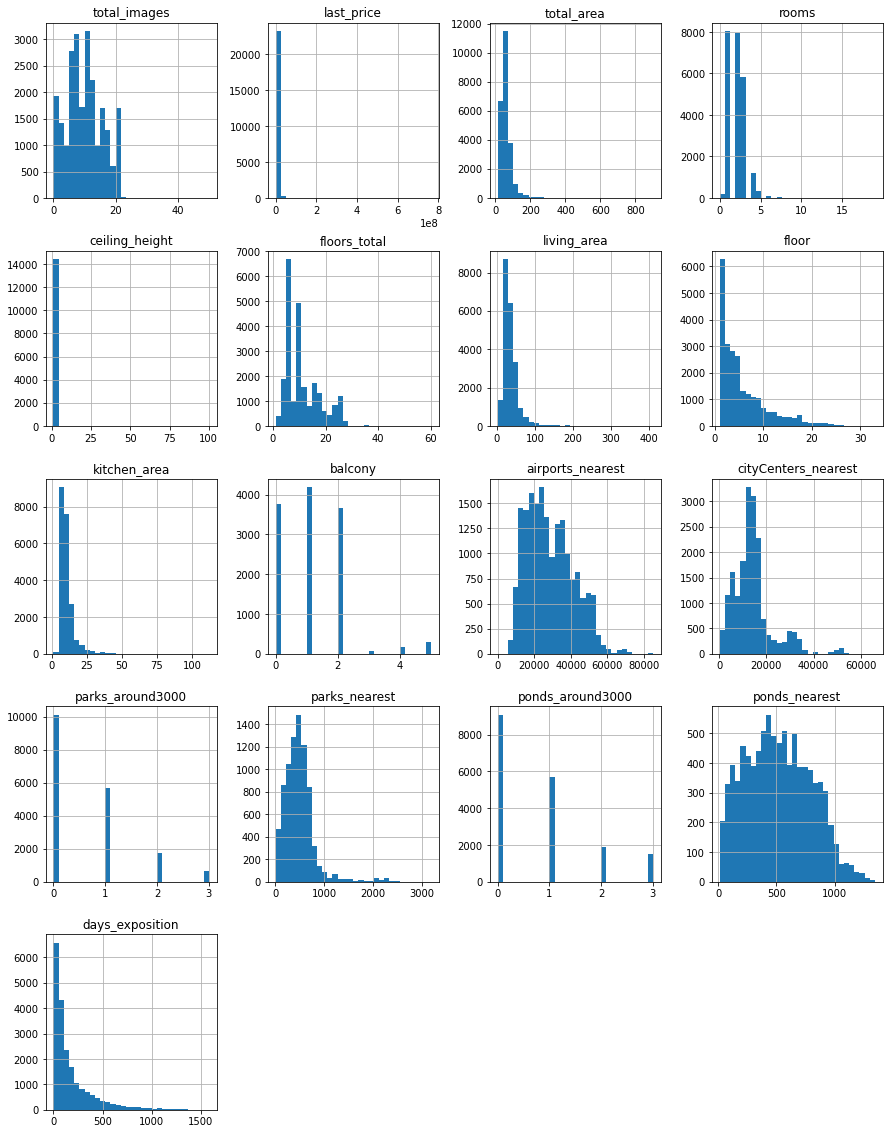

In [5]:
data.hist(figsize=(15, 20), bins=30);

Почти во всех столбцах присутствуют выбросы. 
Кажется что среди обычных квартир присутсвуют огромные квартиры или даже дома класса люкс (например с площадью 900 м2), от которых следует избавиться, так как они слишком отличаются от основнй выборки.

#### Вывод

Данные сыроваты. Много пропусков и выбросов.   
В некоторых столбцах отсутствует более половины значений.  
Присутствуют данные, не совсем подходящие под описание средней квартиры - площадь 900 м2 и потолок 100м явно не типичная квартира.
Прежде чем приступать к анализу стоит провести тщательную предобработку.

### Предобработка данных

#### Изучение пропусков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


In [10]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
data[(data['kitchen_area'].isna())]['studio'].value_counts()

False    2129
True      149
Name: studio, dtype: int64

In [12]:
data[(data['days_exposition'].isna())]['first_day_exposition'].value_counts().head(10)

2019-04-22T00:00:00    46
2019-04-18T00:00:00    44
2019-04-29T00:00:00    36
2019-04-04T00:00:00    36
2019-04-08T00:00:00    36
2019-04-17T00:00:00    35
2019-04-26T00:00:00    35
2019-04-15T00:00:00    34
2019-04-16T00:00:00    32
2019-04-24T00:00:00    32
Name: first_day_exposition, dtype: int64

In [13]:
#проверим, что если картографические данные пропущены, то пропущены сразу все 
data[(data['airports_nearest'].isna()) 
     & (data['cityCenters_nearest'].isna()) 
     & (data['parks_around3000'].isna()) 
     & (data['ponds_around3000'].isna())
     & (data['parks_nearest'].isna())
     & (data['ponds_nearest'].isna())].shape[0]

5518

Восстановить данные можно только в столбце **balcony**. Скорее всего пропущенные значения означают что балкона нет и их число можно заменить на 0.

Огромное количество пропусков в столбце **is_apartment** можно было бы попытаться объяснить тем, что заполнены были бы только значения True, но это не так. Причину такого количества пропусков лучше узнавать у поставщика данных, а до тех пор этот столбец лучше вообще не использовать при анализе данных. Хотя статус апартаментов очень сильно влияет на цену квартиры и получить эти данные стоило бы.

Большое количество пропусков в столбце **ceiling_height** можно объяснить тем, что эти данные заполняются пользоватеем и далеко не все знают и хотят измерять высоту потолком в квартире. Попытаться заполнить эти данные медианным значением не стоит, так как пропущено слишком много данных.

Пропуски в столбцах **living_area** и **kitchen_area** также скорее всего объясняются тем, что пользователи просто не знали их. Я предположила что площадь кухни не указана в студиях, однако это оказалось не так.  

Пропуски в столбце **days_exposition** можно объяснить тем, что эти квартиры всё ещё не проданы большое количество пропусков в апреле 2019 намекает на то, что датасет как раз тогда и был создан. Однако описание столбца **last_price** — цена на момент снятия с публикации, подразумевает что все квартиры всё таки были проданы, так как пропусков в **last_price** нет. Лучше этот момент уточнить у поставщика данных.

Большое количество пропусков в картографических данных можно попытаться объяснить двумя вариантами. \
Первый: у квартир не указан адрес, а значит и картографические данные рассчитать невозможно. Такое маловероятно, продавать квартиру не указав адрес довольно странно.\
Второй: система совершала поиск ближайшего объекта в некотором радиусе и, например, не найдя аэропорт, оставляла значение пустым. Это может объяснить огромное число пропусков в столбцах **parks_nearest, ponds_nearest**. Однако не объясняет пропуски в количестве объектов в радиусе 3км, здесь система могла без проблем указать ноль в таком случае.  \
Третий: данная функция появилась в сервисе не сразу, поэтому в более старых данных просто нет картографической информации. Это предположение можно будет проверить позже, когда формат даты публикации объявления будет изменён со строки на дату.\
При желании картографические данные можно заполнить, если узнать адреса или координаты квартир.

In [14]:
# Заполним пропуски в количестве балконов
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().mean()

0.0

#### Изменение типов данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Тип переменных ``total_images, rooms, floors_total, floor, balcony, parks_around3000, ponds_around3000, days_exposition`` нужно заменить на ``int16`` так как все эти значения целочисленные и не должны быть больше 65536. Некоторые из этих переменных для экономии места можно было бы хранить в ``int8`` но размер данных не настолько велик, чтобы это имело значение.   
Переменные ``last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest`` могут хранить нецелые значения, но их можно округлить до целых. Копейки в цене и сантиметры в расстояниях вряд ли повлияют на анализ данных, так как значения достаточно большие. Следовательно тип можно заменить на ``int32``.   
Значения переменных ``total_area, living_area, kitchen_area, ceiling_height`` можно было бы перевести из метров в сантиметры и округлить до целых чисел, но я оставлю всё как есть.   
``first_day_exposition`` следует заменить на дату.  
``is_apartment`` следует привести к типу ``bool``.

In [16]:
columns = ['total_images', 
           'rooms', 
           'floors_total', 
           'floor', 
           'balcony', 
           'parks_around3000', 
           'days_exposition', 
           'ponds_around3000']
for column in columns:
    data[column] = data[column].astype(pd.Int16Dtype(), errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  Int16  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  Int16  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  Int16  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  Int16  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  Int16  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [17]:
columns = ['last_price', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']
for column in columns:
    data[column] = data[column].astype(pd.Int32Dtype(), errors='raise')

In [18]:
data['is_apartment'] = data['is_apartment'].astype("boolean")

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', errors='raise')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  Int16         
 1   last_price            23699 non-null  Int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  Int16         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int16         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  Int16         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [21]:
# По непонятной для меня причине тип у days_exposition не преобразовался, пришлость ставить костыль
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'] = data['days_exposition'].astype(int).astype('Int16')
data['days_exposition'] = data['days_exposition'].replace(-1, pd.NA)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  Int16         
 1   last_price            23699 non-null  Int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  Int16         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int16         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  Int16         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [23]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,<NA>,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,<NA>,...,11.0,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,<NA>,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,<NA>,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,<NA>,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


#### Устранение дубликатов

In [24]:
# Проверяем наличие явных дубликатов
data.duplicated().sum()

0

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сразу заменим в данных ``поселок`` на ``посёлок``, так как очевидно что это одно и то же. А также приведём все названия к нижнему регистру.

In [26]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

Значений слишком много, попробуем оставить только название населённого пункта, убрав обозначение его типа. Однако, для начала запишем новые значения в отдельный столбец, чтобы случайно не потерять что-то важное.

In [27]:
types = ['посёлок ', 
         'городской ',
         'деревня ',
         'городского типа ',
         'село ',
         'садоводческое некоммерческое товарищество ',
         'садовое товарищество ',
         'коттеджный ',
         'при железнодорожной ',
         'станции ']
data['locality_name_cuted'] = data['locality_name'].str.lower()
for s in types:
    data['locality_name_cuted'] = data['locality_name_cuted'].str.replace(s, '')
data['locality_name_cuted'].sort_values().unique()

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпосёлок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

А теперь выведем поселения у которых оказалось больше одного уникального названия.

In [28]:
for index, value in data.groupby('locality_name_cuted')['locality_name'].unique().items():
    if value.shape[0] > 1:
        print(index, value)

большая ижора ['городской посёлок большая ижора' 'посёлок городского типа большая ижора']
вещево ['посёлок станции вещево' 'посёлок при железнодорожной станции вещево']
гарболово ['деревня гарболово' 'посёлок гарболово']
громово ['посёлок станции громово' 'посёлок громово']
зимитицы ['посёлок зимитицы' 'деревня зимитицы']
калитино ['деревня калитино' 'посёлок калитино']
кудрово ['деревня кудрово' 'кудрово']
лесное ['посёлок лесное' 'коттеджный посёлок лесное']
лесогорский ['городской посёлок лесогорский' 'посёлок городского типа лесогорский']
любань ['любань' 'посёлок любань']
мга ['городской посёлок мга' 'посёлок городского типа мга']
мурино ['посёлок мурино' 'мурино']
назия ['городской посёлок назия' 'посёлок городского типа назия']
никольское ['никольское' 'село никольское']
павлово ['село павлово' 'городской посёлок павлово'
 'посёлок городского типа павлово']
приветнинское ['посёлок станции приветнинское'
 'посёлок при железнодорожной станции приветнинское']
приладожский ['посёлок

Сразу можно скаазать, что ``городской поселок`` и ``поселок городского типа`` это одно и то же. А также ``поселок при железнодорожной станции`` и ``поселок станции`` тоже одно и то же. А вот дальше интереснее.   

``Кудрово, Мурино и Фёдоровское`` в какой-то момент меняли свой статус, например с деревни на город. Т.е. географически это одно и то же место, но вот цена квартир после смены статуса с деревни на город могла измениться. Однако я не буду рассматривать этот момент и буду считать что это одно и то же поселение.  
В 2016 году в Кудрово уже стояли современные многоэтажки и деревней это было назвать сложно, а статус города был присвоен только в мае 2018. Делить данные из датасета на две части значит скорее всего потерять Кудрово из топ-10 по количеству объявлений, хотя это на самом деле огромный спальный район.   
Мурино получило статус города 26 апреля 2019 года, т.е. эти данные еле-еле проскочили в датасет. Отделять те несколько квартир в отдельную категорию тоже вряд ли целесообразно.  

Поселения ``зимитицы, лесное, никольское, павлово, рябово, рабитицы, рахья`` имеют по два экземпляра в Ленинградской области. Т.е. это совсем разные поселения, зачастую в разных районах ЛО. Например указанные в инструкции посёлок и ПГТ Рябово находятся на расстоянии примерно в 200км друг от друга. Так что у меня появились вопросы к составителю инструкции.

Ну и последний вариант это ``гарболово, калитино, любань, щеглово`` это юридически разные поселения, однако находятся они вплотную друг к другу и являются по сути районами одного общего поселения. По существу стоило бы разделить их, однако я их всё же объединю, так как это небольшие населённые пункты и число записей по ним также невелико.

Чтобы далее вести анализ по укороченным названиям, вернём к имеющим дубликат тип поселения

In [29]:
locality_names = ['посёлок зимитицы', 
                 'деревня зимитицы', 
                 'посёлок лесное', 
                 'коттеджный посёлок лесное', 
                 'никольское', 
                 'село никольское', 
                 'село павлово', 
                 'посёлок городского типа павлово', 
                 'посёлок рябово', 
                 'посёлок городского типа рябово', 
                 'деревня рабитицы', 
                 'посёлок рабитицы', 
                 'посёлок городского типа рахья', 
                 'садовое товарищество рахья']
for name in locality_names:
    data.loc[data['locality_name'] == name, 'locality_name_cuted'] = name


# Отдельно обработаем один упущенный вариант
data.loc[data['locality_name'] == 'городской посёлок павлово', 'locality_name_cuted'] = 'посёлок городского типа павлово'

Теперь все названия поселений уникальные и столбец со старыми названиями можно удалить. Однако я его на всякий случай оставлю.

#### Устранение выбросов

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squre_meter_price,publication_year
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,9.942166e+04,2017.367146
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,5.030680e+04,1.039771
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118349e+02,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658547e+04,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,2017.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2019.000000


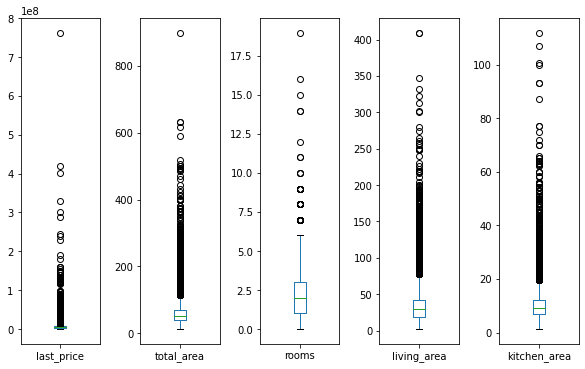

In [41]:
data.loc[:,['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6),
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

😉 Квартира senior data scientist

In [42]:
data.loc[data['total_area'] > 800]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_cuted,squre_meter_price,publication_year
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,<NA>,...,30706,7877,0,<NA>,2,318,106,санкт-петербург,466666.666667,2017


По этим параметрам выбросы вряд ли являются ошибками в данных. Не совсем понятны квартиры с площадью более 200 м2. Возможно это дома, либо коммунальные квартиры.   
Однако даже если это реальные данные, их стоит убрать из наших данных. Так как мы рассматриваем обычные квартиры. Жильё класса люкс следует выделить в отдельный датасет и рассматривать также отдельно.  
Поставим ширину для наших данных в 3 ширины усов коробки, остальное удалим.

In [43]:
data_len = data.shape[0]

def drop_outliers(data, cols, scale=1.5):
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    return data[~((data[cols] < (Q1 - 3 * IQR)) |(data[cols] > (Q3 + 3 * IQR))).any(axis=1)]

cols = ['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area']

data = drop_outliers(data, cols, 3)

print('Удалено данных: ', {(data_len - data.shape[0]) / data_len})

Удалено данных:  {0.052829233300983165}


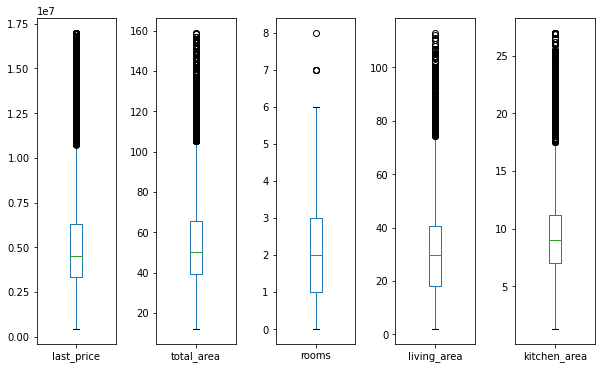

In [44]:
data.loc[:,['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6),
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

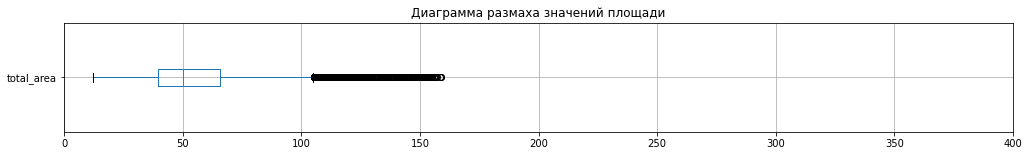

In [45]:
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

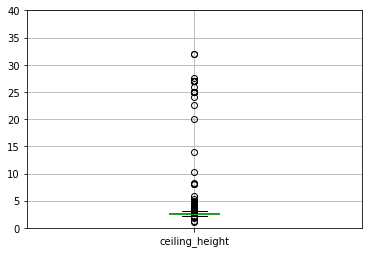

In [46]:
plt.ylim(0, 40)
data.boxplot(column='ceiling_height')
plt.show()

На графике видно небольшую концентрацию значений в районе 20-35м. Можно предположить, что пользователи по ошибке указали данные в 10 раз больше и изменить эти значения.

In [47]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

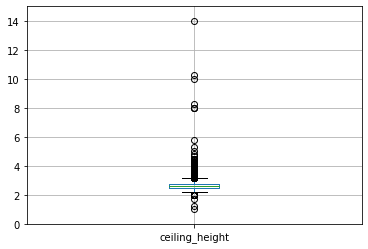

In [48]:
plt.ylim(0, 15)
data.boxplot(column='ceiling_height')
plt.show()

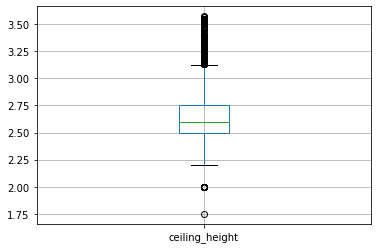

In [49]:
data = drop_outliers(data, ['ceiling_height'], 3)
data.boxplot(column='ceiling_height')
plt.show()

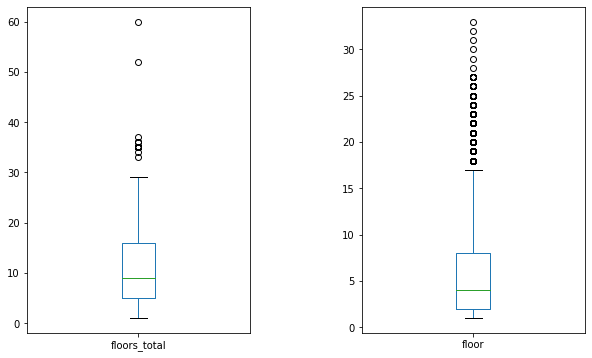

In [50]:
data.loc[:,['floors_total', 'floor']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6),
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

Данные по этажам выглядят нормально. Единственная аномалия это 50-60 этажные дома. Вряд ли квартира продавалась в Лахта Центре, от этих данных следует избавиться.

In [51]:
print('Строк удалено: ', data.loc[data['floors_total'] >= 40].shape[0])
data = data.loc[data['floors_total'] < 40]

Строк удалено:  2


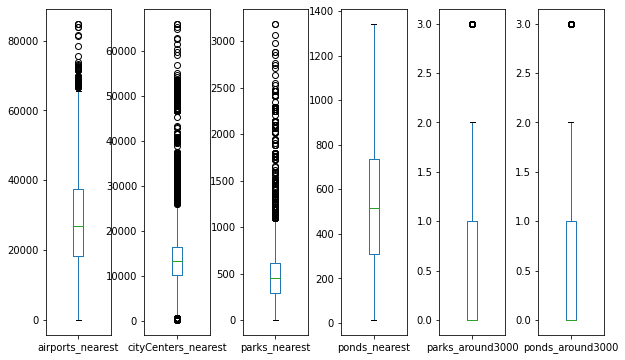

In [52]:
data.loc[:,['airports_nearest','cityCenters_nearest','parks_nearest','ponds_nearest','parks_around3000','ponds_around3000']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6),
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

Учитывая, что данные представлены по всей Ленинградской области, данные выглядят нормально. Избавляться от данных в удалённых населённых пунктах было бы неправильно.  
Интересно каким образом рассчитывалось расстояние до парков в сёлах и деревнях. При анализе данных стоит обратить на это внимание, помня количество пропусков в этом столбце появляется предположение, что расстояние до парка считалось только в СПб и других городах ЛО.

Довольно много квартир продавалось больше трёх лет. Взглянем на них чтобы проверить некоторые предположения.

In [53]:
df = data.loc[data['days_exposition'] > 1300,['first_day_exposition', 'days_exposition']]
df['sold_date'] = df['first_day_exposition'] + pd.to_timedelta(df['days_exposition'], unit='d')
df.sort_values(by='sold_date')

,first_day_exposition,days_exposition,sold_date
4889,2014-12-10,1314,2018-07-16
13246,2014-11-27,1341,2018-07-30
398,2014-12-09,1345,2018-08-15
21860,2014-12-09,1346,2018-08-16
10364,2014-11-27,1391,2018-09-18
23426,2014-12-29,1360,2018-09-19
4789,2015-03-04,1305,2018-09-29
12487,2015-01-21,1350,2018-10-02
18989,2015-02-19,1322,2018-10-03
6726,2014-11-27,1406,2018-10-03


Итак, если бы мы увидели, что все квартиры были проданы в день создания датасета, то можно было бы решить, что эти квартиры на самом деле до сих пор не проданы. Однако это не так.  
Также нет какого-то однообразия по количеству дней, так можно было бы предположить, что объявления были закрыты автоматически через какой-то срок. Однако это не так, да и вряд ли бы этот срок составлял 4 года.  
Получается что или квартиры действительно так долго продавались, либо их забывали удалить с площадки, а потом вспоминали удалить через случайное время, например при повторном выставлении на продажу.  
Таким образом от этих данных лучше также избавится в пределах 3 усов. Впрочем данные старше трёх лет в недвижимости вообще считаются не особо релевантными.

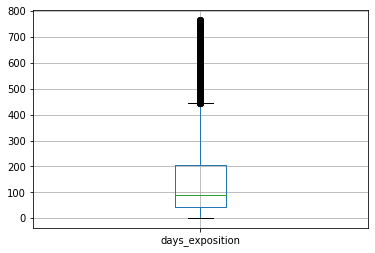

In [54]:
data = drop_outliers(data, ['days_exposition'], 3)
data.boxplot(column='days_exposition')
plt.show()

Остались квартиры, проданные меньше чем за 2.2 года, уже не так плохо. 

In [55]:
data = data.reset_index(drop=True)

#### Вывод

Среди пропусков удалось устранить только в данных по количеству балконов в квартире.  
Наибольшее количество пропусков находится в картографических данных, восстановить их можно только обратившись к поставщику данных.  

Исправить выбросы удалось только в значениях высоты потолков, где предположительно пользователи случайно указали величины на порядок больше.  
Строки, содержащие неадекватно большие или дорогие квартиры было решено удалить, чтобы они не влияли на выборку.  
Также были удалены строки с квартирами, которые продавались слишком долго, так как неизвестно были ли они в итоге проданы или просто сняты с публикации.  

Столбец с наименованием населённых пунктов был тщательно изучен. Как оказалось не все поселения с одинаковыми названиями являются дубликатами. Например «поселок Рябово» и «поселок городского типа Рябово» это совершенно разные населённые пункты, а вот посёлок городского типа и городской посёлок это всегда одно то же.  
В итоге реальные дубликаты были устранены, а прочие оставлены с указанием типа населённого пункта.

Проверим какие аномалии остались

In [57]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,619.00","21,619.00","13,099.00","18,820.00","21,619.00","19,930.00","19,545.00","21,619.00","21,619.00"
min,0.00,12.00,1.75,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,8.00,159.00,3.57,764.00,"17,000,000.00",113.00,27.00,33.00,37.00
median,2.00,50.00,2.60,90.00,"4,500,000.00",29.70,9.00,4.00,9.00


Квартиру в 12 м2 можно назвать редкостью, но не аномалией. Например в центре СПб существует практика нарезать коммунальные квартиры на квартиры-студии. В итоге комната 12 м2 превращается в квартиру.  
Высота потолка также скорее редкость. Вопрос, например, как считать высоту потолка в мансардном помещении со скошенной крышей? Выбирать максимум, минимум или среднее?  
Аномалии в квартире, проданной за день я тоже не вижу. По личному опыту, хорошие варианты улетают с площадок как горячие пирожки.  
living_area и kitchen_area в минимуме действительно неадекватны. Можно предположить, как было с потолками, что пользователь ошибся на порядок.  
        
Подводя итог, редкие значения лучше всё таки удалить. Вряд ли их доля хоть сколько-то значима, а статистику могут портить. Ну а с жилой и кухней будем разбираться.
        
Ну а насчёт хвостов. Я уже обрезала примерно 10% данных. Как написано далее, это максимум. Что в таком случае делать с хвостами непонятно. Если предположить что все данные верные. А особого недоверия к квартире в 159 м2 или сроку в два года у меня нет. 

Попытаемся избавиться от аномально маленьких кухонь и комнат.

Посмотрим что же там не так с маленькими комнатами и кухнями. Если реальная площадь в 10 раз больше указанной, то она должна не вылезать за рамки общей площади квартиры.

In [65]:
data.loc[(data['living_area'] * 10 <= ( data['total_area'] - data['kitchen_area'])), 
         ['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
2937,41.0,3.0,11.0
12677,52.0,2.0,9.0
20019,77.6,5.4,9.8


В первой квартире выходит нет ни коридора, ни санузла. Всякое бывает, это лучше чем комната 3 м2.  
Во второй квартире даже при умножении на 10, неизвестно чем занято 23 м2. Возможно они украли коридор и санузел в предыдущей квартире 🤪  
в третьей же квартире с комнатами в 54 м2 всё будет адекватно.

In [66]:
data.loc[(data['living_area'] * 10 <= ( data['total_area'] - data['kitchen_area'])),'living_area'] *= 10

Посмотрим какие квартиры с маленькими жилыми площадами скрылись от нас.

In [67]:
data.loc[(data['living_area'] < 8), 
         ['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']]

,total_area,living_area,kitchen_area,rooms,studio
14983,31.0,6.0,17.0,1,False
16023,22.0,5.0,NaN,0,True
17548,33.0,6.5,18.0,1,False
19852,23.0,2.0,NaN,0,True


Nan вычесть нельзя и мы пропустили этот вариант. Ошибка! В четвёртой строке можно также домножить площадь на 10. А вот что хотел сказать автор объявления из второй строки непонятно, проще всего эту строку удалить)

А вот в двух других вариантах кажется перепутали площадь комнат и кухни.

In [68]:
# Так, наверное, не надо 
# data.loc[19852, 'living_area'] *= 10

data.loc[(data['total_area'] == 23.0) & (data['living_area'] == 2.0), 'living_area'] *= 10

# Хотя ладно
data.loc[14983,'living_area'] = 17.0
data.loc[14983,'kitchen_area'] = 6.0
data.loc[17548,'living_area'] = 18.0
data.loc[17548,'kitchen_area'] = 6.5

# Удалим последнюю
data = data.drop(data[data['living_area'] <= 5].index)

С комнатами справились, перейдём к кухням.

In [69]:
data.loc[(data['kitchen_area'] * 10 <= ( data['total_area'] - data['living_area'])), 
         ['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
7956,151.5,57.1,7.7
20100,145.0,39.0,10.0


Совсем не то, что мы ожидали увидеть. Тут условие выполняется но кухня вряд ли в реальности 77 или 100 метров. 

Интересно, чо же там всё таки за квартиры с микроскопическими кухнями?

In [70]:
data.loc[(data['kitchen_area'] < 3), 
         ['total_area', 'living_area', 'kitchen_area', 'rooms', 'studio']]

,total_area,living_area,kitchen_area,rooms,studio
809,27.00,18.0,2.00,1,False
5701,24.00,16.0,2.00,2,False
7235,66.40,44.4,2.89,2,False
7953,18.40,14.0,2.40,1,False
8335,23.29,21.0,2.00,1,False
10064,32.00,16.0,2.00,1,False
14923,25.70,22.6,2.00,1,False
16255,34.70,15.5,2.30,1,False
17906,14.00,11.0,2.00,1,False
18438,28.50,19.5,1.30,1,False


Чтобы понять что тут происходит, придётся подробнее взглянуть на такие квартиры. А так как в нашем датасете данных маловато, я залезла на Яндекс недвижимость в поиске подобных объявлений. (кстати ужасно неудобная фильтрация на сайте)  
Итак что я нашла:
1) квартира является студией, но указана как однушка, отсюда и кухни в 2 м2. По хорошему надо менять тип на студию, комнаты на ноль, а кухню на NA;  
2) пользователь судя по всему указал сторону квадратной кухни, это получилось вычислить по плану квартиры. Тут просто можно возвести значение в квадрат.

Остаётся вопрос: верно ли я интерпретировала данные или проще всё таки избавиться от десятка значений во избежание головной боли?  
В учебных целях можно было бы и повозиться, но на практике мне кажется никто бы не стал тратить на это время.

In [71]:
data[data['kitchen_area'] < 4].shape[0]

28

In [72]:
data = data.drop(data[data['kitchen_area'] < 4].index)

Теперь разберёмся с низкими потолками и быстрыми продажами. Всё таки один день может указывать и на удалённые без продажи варианты.

In [73]:
(
    data[['ceiling_height', 'days_exposition']]
    .quantile([0.001, 0.01]) 
    .style.format("{:,.2f}")
)

,ceiling_height,days_exposition
0.001,2.20,3.00
0.01,2.50,4.00


Ниже 2.2м и быстрее 3 дней всего-то 0.1%! Смело отбрасываем.

In [74]:
data = data.drop(data[data['ceiling_height'] < 2.2].index)
data = data.drop(data[data['days_exposition'] < 3].index)

In [75]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,573.00","21,573.00","13,065.00","18,780.00","21,573.00","19,887.00","19,503.00","21,573.00","21,573.00"
min,0.00,12.00,2.20,3.00,"430,000.00",8.00,4.00,1.00,1.00
max,8.00,159.00,3.57,764.00,"17,000,000.00",113.00,27.00,33.00,36.00


Теперь всё выглядит получше.

In [76]:
data.shape[0]

21573

Итого, без дополнительного отсекания хвостов уже удалено 9% датасета. Из чего я делаю вывод, что продолжать отсекать хвосты не стоит, чтобы не вылезти за рекомендованные 10%

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в данные следующие стобцы:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [77]:
data['squre_meter_price'] = data['last_price'] / data['total_area']

In [78]:
data['publication_day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [79]:
data['publication_month'] = data['first_day_exposition'].dt.month

In [80]:
data['publication_year'] = data['first_day_exposition'].dt.year

In [81]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] > 1 and row['floor'] < row['floors_total']:
        return 'другой'
    return 'ошибка'

data['floor_type'] = data.apply(lambda row: floor_type(row), axis=1)

In [82]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype(pd.Int32Dtype(), errors='raise')

In [83]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_cuted,squre_meter_price,publication_year,publication_day_of_week,publication_month,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,<NA>,...,2,755,<NA>,санкт-петербург,120370.37037,2019,3,3,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,<NA>,...,0,<NA>,81,шушары,82920.792079,2018,1,12,первый,18
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,<NA>,...,2,574,558,санкт-петербург,92785.714286,2015,3,8,другой,13
3,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,<NA>,...,<NA>,<NA>,55,янино-1,95065.789474,2018,0,9,другой,<NA>
4,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,<NA>,...,0,<NA>,155,парголово,99195.710456,2017,3,11,другой,19
5,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,<NA>,...,0,<NA>,<NA>,санкт-петербург,110544.692737,2019,3,4,другой,11
6,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,<NA>,...,<NA>,<NA>,189,мурино,87454.764777,2018,2,5,другой,<NA>
7,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,<NA>,...,0,<NA>,289,санкт-петербург,88524.590164,2017,6,2,другой,15
8,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,<NA>,...,2,553,137,санкт-петербург,127525.252525,2017,3,11,другой,13
9,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0,<NA>,7,ломоносов,75000.0,2018,0,8,другой,51


#### Вывод

В датасет добавлен один категориальный столбец с типом этажа: «первый», «последний», «другой».  
А также пять количественных: цена одного квадратного метра; год, месяц и день недели публикации; расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

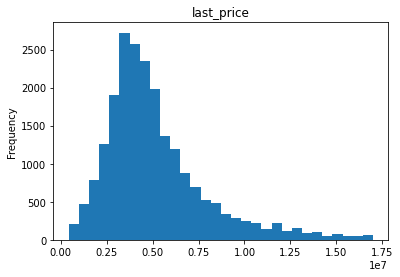

In [84]:
data.loc[:, 'last_price'].plot(kind='hist', bins=30, title='last_price')
plt.show()

График похож на нормальный, но с хвостом в сторону дорогих квартир. Если бы мы отбросили больше данных при обработке, график был бы более нормальным.  
Большинство квартир было продано за 2-8 миллиона, вполне ожидаемые цены для СПб и ЛО.

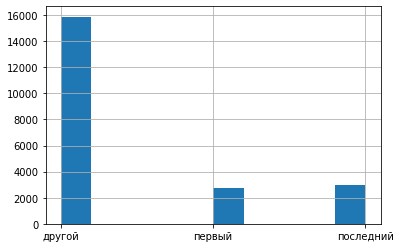

In [85]:
data['floor_type'].hist()
plt.show()

Здесь всё логично, квартир на первом и последнем этаже примерно поровну, а других гораздо больше.

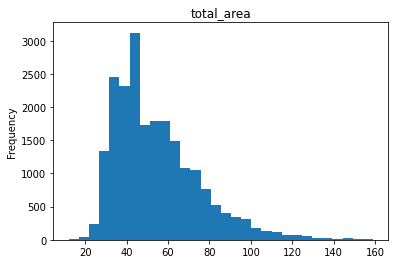

In [86]:
data.loc[:, 'total_area'].plot(kind='hist', bins=30, title='total_area')
plt.show()

Этот график уже совсем не похож на нормальный. Высокие пики скорее всего отображают размер самых типовых квартир, например одно- и двух-комнатных хрущёвок. Самый популярный размер квартир 30-70 м2.

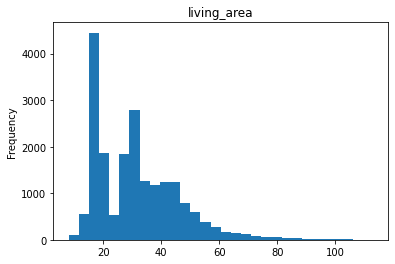

In [87]:
data.loc[:, 'living_area'].plot(kind='hist', bins=30, title='living_area')
plt.show()

Здесь уже явно выделяется три пика, сооттветствующие одной, двум и трём жилым комнатам. 

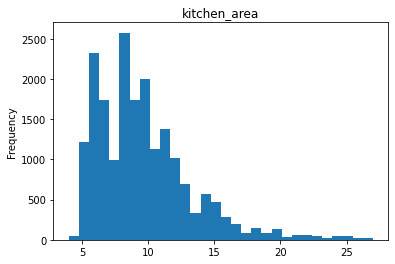

In [88]:
data.loc[:, 'kitchen_area'].plot(kind='hist', bins=30, title='kitchen_area')
plt.show()

Здесь кажется странным провал на 9. Можно предположить, что при размещении объявлении пользователи немного приврали указав 10 вместо 9, чтобы квартира выглядела привлекательнее или выдавалась в поиске от 10 м2. Либо теми же сооьажениями руководствовались застройщики при планировке квартир.  
Пики также указывают на самые популярные виды планировки. Например кухня в хрущёвке как раз примерно 6 м2.

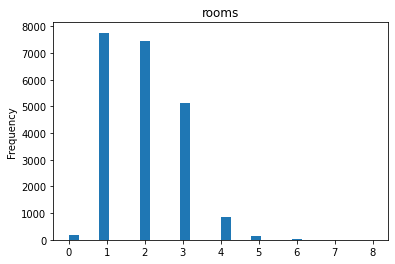

In [89]:
data.loc[:, 'rooms'].plot(kind='hist', bins=30, title='rooms')
plt.show()

Здесь мне кажется странным малое количество студий. Видимо в этот период времени большинство студий покупались ещё напрямую от застройщика, а в датасете представлен рынок вторичной недвижимости.  
Также я ожидала что однокомнатных квартир будет больше. 

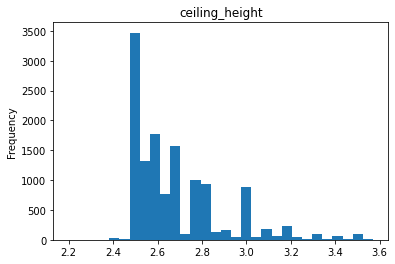

In [90]:
data.loc[:, 'ceiling_height'].plot(kind='hist', bins=30, title='ceiling_height')
plt.show()

Здесь выглядит логичным наличие пиков по самым типичным значениям высоты потолка. Странными являются значения в два и меньше метра, возможно это какие-то мансардные или подвальные помещения, переделанные под жилые.

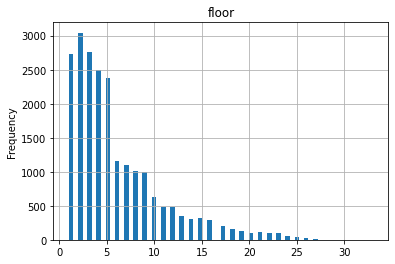

In [91]:
data.loc[:, 'floor'].plot(kind='hist', bins=66, title='floor', grid=True)
plt.show()

Здесь можно увидеть сильное влияние пяти- и двевятиэтажных домов. Весьма логично.

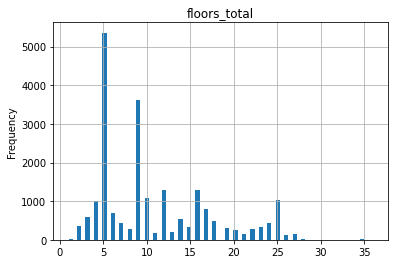

In [92]:
data.loc[:, 'floors_total'].plot(kind='hist', bins=72, title='floors_total', grid=True)
plt.show()

Здесь видим подтверждение вывода из предыдущего графика, пяти- и двевятиэтажных домов действительно очень много. Также видны пики самых популярных видов новостроек в 12, 16 и 25 этажей

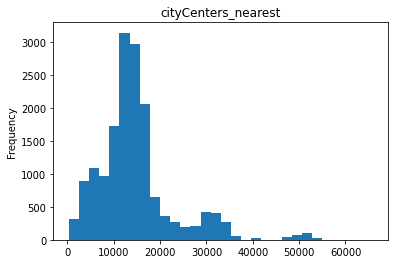

In [93]:
data.loc[:, 'cityCenters_nearest'].plot(kind='hist', bins=30, title='cityCenters_nearest')
plt.show()

Здесь можно ожидать обратное квадратичное распределение - чем больше радиус окружности от центра, тем обольше там поместится домов. Также видны пики, вероятно они относятся к каким-то городам спутникам, типа Мурино и Кудрово, если расстояние рассчитывалось именно до центра СПб.

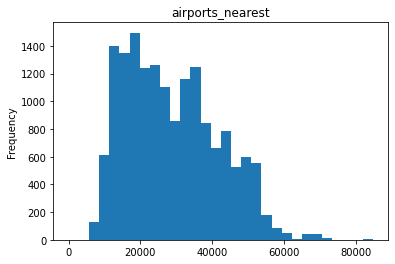

In [94]:
data.loc[:, 'airports_nearest'].plot(kind='hist', bins=30, title='airports_nearest')
plt.show()

Аэрпорт, находится за пределами города, но не слишком далеко от него.  
Странным выглядит пик в районе 35км. Вероятно это какой-то популярный спальный район, либо даже совпало расстояние до нескольких спальных районов.

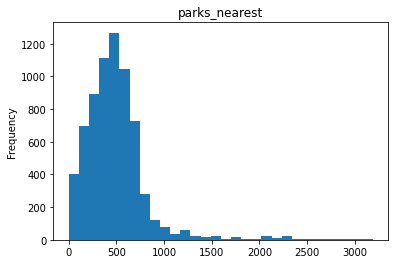

In [95]:
data.loc[:, 'parks_nearest'].plot(kind='hist', bins=30, title='parks_nearest')
plt.show()

Если отбросить хвост, то это распределение вполне похоже на нормальное.  
Самое частое расстояние до парка - 500м, не так то и плохо, примерно 6 минут пешком, но каждый день не погулешь.

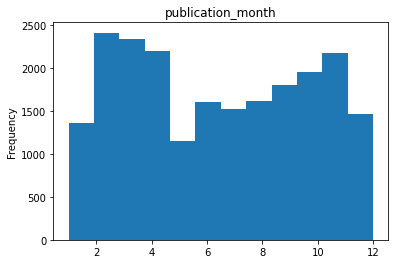

In [96]:
data.loc[:, 'publication_month'].plot(kind='hist', bins=12, title='publication_month')
plt.show()

Самые непопулярные месяцы - январь и май, видимо в праздники люди неохотно выставляют квартиры на продажу. Зато февраль-апрель успешно компенсируют эти провалы. 

Но январь-апрель есть за 2019 год, а других месяцев нет. Тогда кажется, что эти месяца должны быть значительно выше. Попробуем отбросить 2019й год.

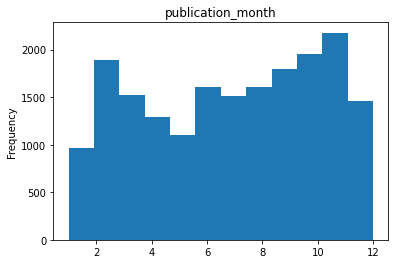

In [97]:
data.loc[data['publication_year'] < 2019, 'publication_month'].plot(kind='hist', bins=12, title='publication_month')
plt.show()

Теперь вообще ничего не понятно. Отдохувшие в январе граждане резко оживляются в феврале, потом интерес плавно падает до лета. А с июня начинается рост по ноябрь.  
Ну хотя бы выводы про май и январь можно оставить как было.

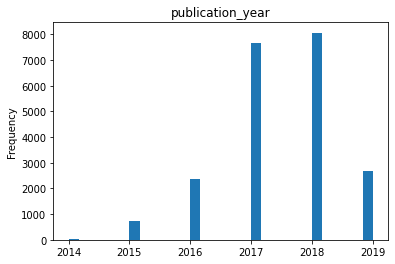

In [98]:
data.loc[:, 'publication_year'].plot(kind='hist', bins=30, title='publication_year')
plt.show()

Здесь всё логично со временем популярнось сервиса росла, на нём выставляли больше кватрир. А 2019 год получил мало значений, так как датасет был собран в апреле 2019.

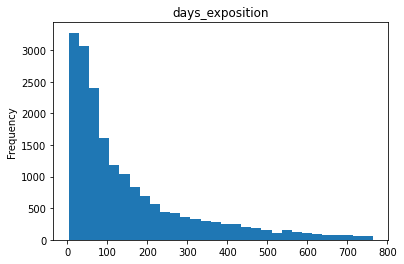

In [99]:
data.loc[:, 'days_exposition'].plot(kind='hist', bins=30, title='days_exposition')
plt.show()

In [100]:
data['days_exposition'].describe()

count    18780.000000
mean       150.547657
std        158.531521
min          3.000000
25%         43.000000
50%         90.000000
75%        204.000000
max        764.000000
Name: days_exposition, dtype: float64

Половина квартир продана менее чем за три месяца, неплохой показатель.  
Наиболее вероятна продажа квартиры за 1.5 - 6.5 месяца.  
Четверть квартир продана менее, чем за 1.5 месяца, это можно считать быстрой продажей.  
Также четверть квартир продано более, чем за 6.5 месяцев, это можно считать долгой продажей.
Рассмотри поближе самые частые значения.

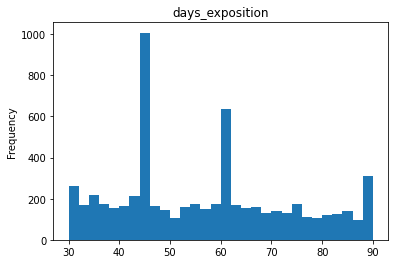

In [101]:
data.loc[:, 'days_exposition'].plot(kind='hist', bins=30, title='days_exposition', range=(30,90))
plt.show()

Какие-то подозрительные пики каждые 15 дней. Явно что-то связанное с автоматической работой сервиса.   
Либо рассылают уведомления пользователям и они снимают проданные квартиры с сайта, либо автоматическое удаление неактивных объявлений.  
Следует узнать точную причину, если на самом деле были удалены не проданные квартиры, то их нужно удалить из наших данных.

Рассмотрим теперь влияние различных параметров на стоимсть квартиры.

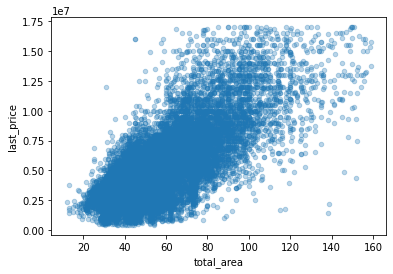

In [104]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

Ожидаемый результат: с ростом площади растёт и цена.

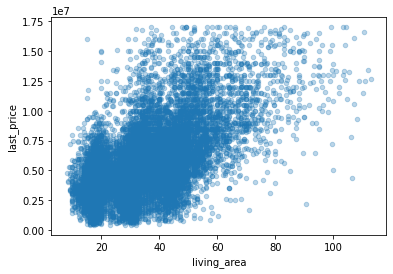

In [105]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

Здесь ещё наблюдается корреляция значений, но уже гораздо слабее.

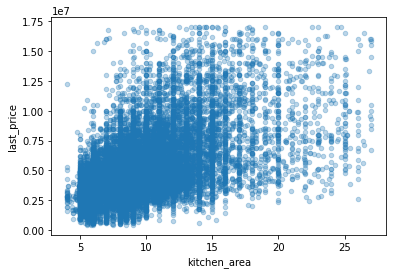

In [106]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

А вот график по площади кухонь уже совсем похож на хаотичное облако. 

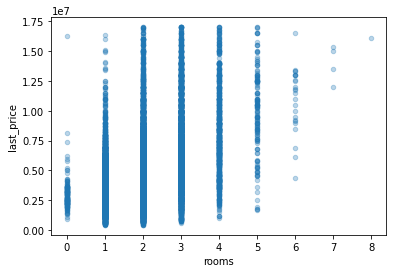

In [107]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()

Совсем ничего не понятно, разве что студии точно дешевле других квартир. Посмотрим на медианные значения по категориям.

In [108]:
rooms_stat = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_stat

,last_price
rooms,
0,2715000.0
1,3600000.0
2,4700000.0
3,5900000.0
4,7500000.0
5,10300000.0
6,11700000.0
7,14245000.0
8,16100000.0


Теперь всё гораздо нагляднее. Медианная цена студии 2.7млн, а за каждую дополнительную комнату до трёхкомнатной квартиры придётся отдать примерно на миллион больше. Начиная с четырёхкомнатных квартир прирост становится больше, но не сильно. В целом рост медианной цены близок к линейному, это легко увидеть на графике.

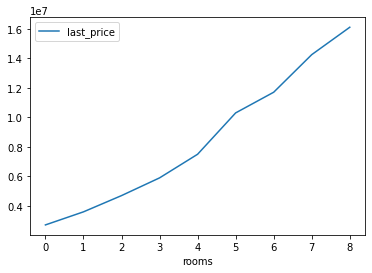

In [109]:
rooms_stat.plot()
plt.show()

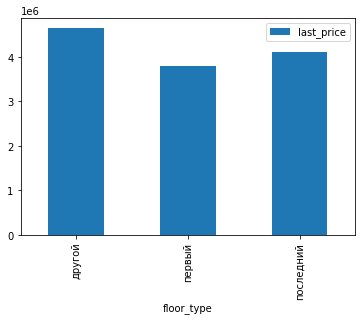

In [110]:
floor_type_stat = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_type_stat.plot(kind='bar')
plt.show()

Ожидаемый результат: квартиры на первом этаже самые дешёвые, квартиры на последнем этаже чуть дороже, но всё равно отстают от других квартир.

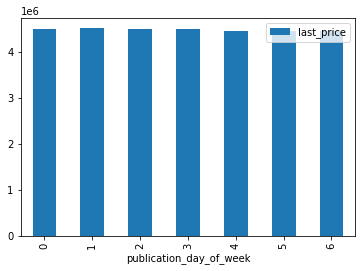

In [111]:
floor_type_stat = data.pivot_table(index='publication_day_of_week', values='last_price', aggfunc='median')
floor_type_stat.plot(kind='bar')
plt.show()

Распределение по дням недели равномерное, что неудивительно.

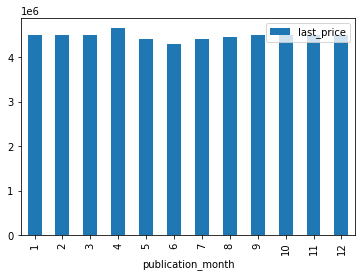

In [112]:
floor_type_stat = data.pivot_table(index='publication_month', values='last_price', aggfunc='median')
floor_type_stat.plot(kind='bar')
plt.show()

По месяцам медианная цена также распределена довольно равномерно. 

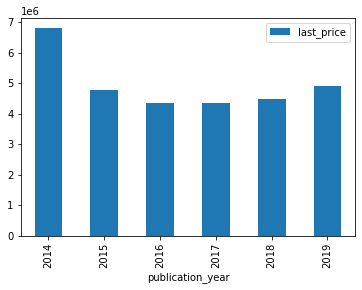

In [113]:
floor_type_stat = data.pivot_table(index='publication_year', values='last_price', aggfunc='median')
floor_type_stat.plot(kind='bar')
plt.show()

Как мы помним, за 2014 год у нас совсем мало данных и делать какие-то выводы по нему нельзя.  
Видно недольшой спад рынка недвижимости в 2016 году, а потом плавный рост.

In [114]:
data.pivot_table(index='publication_year', 
                 values=['total_area','cityCenters_nearest', 'squre_meter_price', 'last_price'], 
                 aggfunc={'cityCenters_nearest':['median','count'],
                          'total_area': 'median', 
                          'squre_meter_price': 'median',
                          'last_price': 'median'})

cityCenters_nearest          last_price squre_meter_price  \
                               count   median     median            median   
publication_year                                                             
2014                              39  10765.0  6800000.0           97000.0   
2015                             575  12449.0  4790000.0      89880.860936   
2016                            1854  13299.5  4350000.0      90425.531915   
2017                            5929  13498.0  4350000.0      91137.123746   
2018                            5847  13587.0  4490000.0      94718.490788   
2019                            2021  13445.0  4900000.0     101870.068149   

                 total_area  
                     median  
publication_year             
2014                 69.000  
2015                 55.615  
2016                 50.940  
2017                 50.000  
2018                 49.200  
2019                 50.050

Сразу отметим крайне низкое количество записей за 2014 год. Его мы рассматривать не будем.

Кажется что с каждым годом город растёт вширь и расстояние до центра тоже должно расти. Однако рост хоть есть, но не такой активный, как кажется. За четыре года медиана подросла всего на километр. Однако, если в датасете в основном представлена вторичка, то темп роста действительно будет не таким высоким.  

Цена за квадратный метр ведёт себя не также как общая цена. В 2015м году медианная площадь квартир на 10% больше, а вот цена за метр ниже. Цена за квадратный метр росла каждый год и к 2019му году выросла на 13%. 

А вот медианная площадь резко уменьшилась после 2015 года примерно на 10% и дальше почти не менялась.

Если смотреть только на изменение цены по годам мы можем сделать некорректный вывод, что цены падали, а на самом деле цена это параметр на который влияет несколько других факторов, по этой причине можно посмотреть на основные из них: 
        
+ изменение кол-ва записей — принять решение о достаточности данных для анализа и сравнения (сравнивать 100 объявлений и 8000, а возможно, что они еще и из разных локаций, не совсем корректно) 
+ изменение площади, как основного параметра от которого зависит стоимость квартиры, в 2017-2018 гг. на сервис или рынок ИТ-торговли недвижимостью пришел массовый продавец, и средние значения упали ..., а за ней и цена
+ изменение кол-ва поданных объявлений из разных локаций, т.к. есть питерские квартиры, а есть выборгские квартиры и стоят они по разному, и в разные годы могло быть больше квартир из определенной локации
+ полнота периода для анализа, 2014 и 2019 гг. неполные, а у нас есть сезонные колебания цен, например летнее снижение цен
+ изменение доли дорогих категорий в общей выборке (средние этажи)
 
и т.д.

Теперь выберем 10 населённых пунктов с наибольшим числом объявлений и посмотрим медианную цену квадратного метра в них.

In [115]:
popular_locality_stat = data.pivot_table(index='locality_name_cuted', 
                                         values='squre_meter_price', 
                                         aggfunc=['count', lambda x: x.median().round(2)])
popular_locality_stat.columns = ['count','squre_meter_price']
popular_locality_stat.sort_values(by='count', ascending=False).head(10)

,count,squre_meter_price
locality_name_cuted,,
санкт-петербург,13918,103057.33
мурино,568,86311.91
кудрово,452,95985.78
шушары,428,76747.97
всеволожск,379,65648.85
пушкин,337,99431.82
колпино,333,74657.53
парголово,321,91516.56
гатчина,292,67746.29


Самые дорогие квартиры находятся в Санкт-Петербурге.  
Далее по количеству объявлений следует несколько городов-спутников: Кудрово, Парголово, Мурино, Шушары, Всеволожск, Колпино. Цены в них падают по мере удаления от СПб и, соответственно, падению транспортной доступности.  
Пушкин - исторический и туристический центр Ленинградской области, цены здесь лишь немногим уступают СПб.
Гатчина и Выборг это города, уже довольно отдалённые от СПб, особенно Выборг, отсюда и снижение цен.

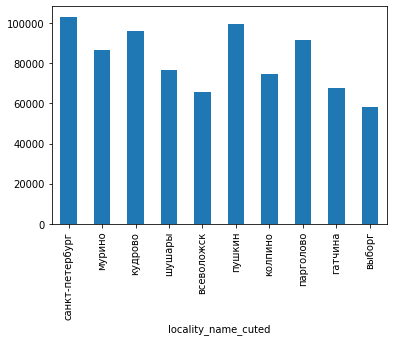

In [116]:
popular_locality_stat.sort_values(by='count', ascending=False)['squre_meter_price'].head(10).plot.bar();

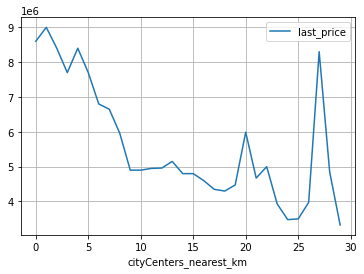

In [117]:
spb_stat = (data.loc[data['locality_name_cuted'] == 'санкт-петербург']
            .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median'))
spb_stat.plot(grid=True)
plt.show()

Цена ожидаемо резко падает при удалении от центра, но имеет два пика. Эти пики, скорее всего, обозначают какие-то дорогие курортные районы, вроде Петергофа.

Стоит изучить записи, которые привели к выбросу на 27-м км.

In [118]:
data.loc[(data['cityCenters_nearest_km'] == 27) & (data['locality_name_cuted'] == 'санкт-петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_cuted,squre_meter_price,publication_year,publication_day_of_week,publication_month,floor_type,cityCenters_nearest_km
671,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,<NA>,...,0,<NA>,128,санкт-петербург,193918.918919,2017,1,11,другой,27
5428,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,<NA>,...,0,<NA>,178,санкт-петербург,70312.5,2018,1,2,последний,27


Всего одна квартира так сильно исказила график. А казалось что на медиану можно положиться.

У нас всего 2 записи на 27-м км., одна из которых с аномальной ценой, по этой причине мы отвергаем данное наблюдение.
Кол-во наблюдений важный параметр для оценки качества данных.

Стоит посмотреть на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом ... и какую долю они занимают на каждом километре, чтобы объяснить пик  и провал в центре.

Для наглядности рассматривать будем долю типов этажей, а не их точное количество.

In [119]:
floors_stat = pd.DataFrame()
for i in range(1,7):
    floors_stat[i] = data.loc[data['cityCenters_nearest_km'] == i,'floor_type'].value_counts()
floors_stat.loc['всего']= floors_stat.sum(axis=0)
floors_stat.loc['другой'] = floors_stat.loc['другой'] / floors_stat.loc['всего']
floors_stat.loc['последний'] = floors_stat.loc['последний'] / floors_stat.loc['всего']
floors_stat.loc['первый'] = floors_stat.loc['первый'] / floors_stat.loc['всего']
floors_stat

,1,2,3,4,5,6
другой,0.536913,0.562814,0.629442,0.748031,0.726433,0.726496
последний,0.268456,0.261307,0.208122,0.130709,0.147874,0.168091
первый,0.194631,0.175879,0.162437,0.121260,0.125693,0.105413
всего,149.000000,199.000000,394.000000,635.000000,541.000000,351.000000


С удалением от центра растёт этажность домов и их количество, это логично. Доля квартир на первом и последнем этаже уменьшается.   
        
Как это объясняет провал на 3 км я не понимаю(

Теперь взглянем на цифры, посмотрим корреляцию цены по каждому параметру.

In [120]:
data.corr()['last_price'].sort_values(ascending=False).to_frame().style.set_precision(1).background_gradient('coolwarm')

,last_price
last_price,1.0
total_area,0.7
squre_meter_price,0.6
living_area,0.6
kitchen_area,0.5
ceiling_height,0.5
rooms,0.5
ponds_around3000,0.2
total_images,0.2
floors_total,0.2


Цена сильнее всего зависит от общей площади квартиры: чем квартира больше, тем она дороже. Чуть меньше она зависит от прочих параметров планировки: жилой площади, кухни, количества комнат и высоты потолков.  
С удалением от центра цена падает, но корреляция довольно слабая. Прочие картографические данные на цену не влияют.

#### Вывод

В среднем после обработки данные выглядят адекватно. 
Цены на кравтиры распределены почти нормально.  
Распределение квартир по этажам и количество этажей соответствуют обилию пяти- и девятиэтажных зданиий в СПб и ЛО.  
В общей и жилой площади квартир прослеживаются значения одно-, двух- и трёхкомнатных квартир.  
Видно что в праздничные месяцы: январь и май, люди неохотно занимаются квартирным вопросом.  
Популярность сервиса растёт со временем, количество объявлений увеличивается каждый год.  
Квартира продаются за 1.5-6.5 месяца, меньше - быстро, больше - долго.  
В сроке размещения объявления прослеживаются подозрительные пики каждые 15 дней. Следует узнать не означают ли они автоматически снятые с публикации неактивные объявления.  
От дня недели или месяца публикации медианная цена не зависит. А вот по годам заметен спад в 2016 году и последующий постепенный рост.

Цена сильнее всего коррелирует с общей площадью квартиры: чем квартира больше, тем она дороже.  
С удалением от центра цена падает, но корреляция довольно слабая.

### Общий вывод

В данных довольно много пропусков. Также присутствуют значения, сильно выбивающиеся из основной массы.

Среди пропусков удалось устранить только в данных по количеству балконов в квартире.
Наибольшее количество пропусков находится в картографических данных, восстановить их можно только обратившись к поставщику данных.

Исправить выбросы удалось только в значениях высоты потолков, где предположительно пользователи случайно указали величины на порядок больше.
Строки, содержащие неадекватно большие или дорогие квартиры было решено удалить, чтобы они не влияли на выборку.
Также были удалены строки с квартирами, которые продавались слишком долго, так как неизвестно были ли они в итоге проданы или просто сняты с публикации.

Столбец с наименованием населённых пунктов был тщательно изучен. Как оказалось не все поселения с одинаковыми названиями являются дубликатами. Например «поселок Рябово» и «поселок городского типа Рябово» это совершенно разные населённые пункты, а вот посёлок городского типа и городской посёлок это всегда одно то же.
В итоге реальные дубликаты были устранены, а прочие оставлены с указанием типа населённого пункта.

График цен на квартиры наиболее похож на нормальный, но с хвостом дорогих квартир.  
Квартир на первом и последнем этаже значительно меньше, чем других квартир, также они дешевле других квартир, первый этаж также дешевле последнего.  
Площадь большинства квартир находится в диапазоне 30-70 м2. На графике распределения площадей наблюдаются пики, скорее всего относящиеся к самым распространённым планировкам квартир.  
В распределении площади жилого помещения явно прослеживаются три пика, относящиеся к одно-, двух- и трёхкомнатным квартирам.  
На крафике площади кухни присутствует странный провал в значении 9м2. Возможно пользователи при размещении объявления или застройщики при планировке квартир решили что 10 гораздо более привлекательное число.\   
В датасете очень мало квартир-студий. Если в сервисе размещались только объявления о продаже вторичной неджвижимости, то это можно объяснить тем, что большинство студий пока покупается от застройщика.\  
В столбце с высотой потолков транными являются значения в два и меньше метра, возможно это какие-то мансардные или подвальные помещения, переделанные под жилые.  
Данные о этаже и их количестве отображают распространённость пяти- и девятиэтажных зданий.  
В центре города квартир ожидаемо меньше, чем на периферии. На значительном отдалении от центра есть несколько пиков, указывающих на города-спутники.  
Парки находятся на расстоянии от 100 до 800 м для подавляющего большинства квартир.  
Самые непопулярные месяцы для выставления квартиры на продажу - январь и май, видимо в праздники люди неохотно занимаются квартирным вопросом.  
Количество публикаций на сервисе растёт со временем, что указывает на рост его популярности.  
Наиболее вероятна продажа квартиры за 1.5 - 6.5 месяца. Четверть квартир продана менее, чем за 1.5 месяца, это можно считать быстрой продажей. Также четверть квартир продано более, чем за 6.5 месяцев, это можно считать долгой продажей. Рассмотри поближе самые частые значения.   
От дня недели или месяца публикации цена не зависит. 
Медианная цена за квадратный метр ежегодно росла. Прирост с 2015 по 2019 год составил 13%.
А вот медианная площадь в 2016 году уменьшилась примерно на 10% и с тех пор почти не менялась.

Система автоматически удаляет неактивные объявления через 30, 45, 60 и 90 дней для разных категорий. Хотелось бы получить информацию о том, какие квартиры были проданы, а какие удалены.

Цена сильнее всего коррелирует с общей площадью квартиры: чем квартира больше, тем она дороже. 
Медианная цена студии составляет 2.7млн, за 1, 2 и 3 комнаты цена на миллион дороже за каждую.   
С удалением от центра цена падает, но корреляция довольно слабая.